<a href="https://colab.research.google.com/github/Tiru-Kaggundi/Adv_ML_project/blob/main/LM_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this milestone, we will be categorizing whether a given text belongs to one of the Indian languages from a set of {Hindi, Malayalam, Kannada, Tamil, Bengali}. For this we will create a Bag of Vectors for each language. Here are the steps that we aim to implement-

Collate the dataset for each language. We will use the Hindi, Kannada, Tamil, Malayalam, and Bengali Wikipedia articles to train our model. Use publicly available tokenizers (or generate a new one if possible - stretch goal) to create a Bag of Words Create a Bag of Words classifier using linear layers Train the Classifier

For Language Identification, a lot of work has been done to classify and identify languages with latin as the predominant script. Some work has also been done to identify Chinese, Japanese, and Korean languages. Jauhiaihen et al has done a detailed survey on the literature that exists for Language Identification tasks. Kerwin (2006) used character frequencies as feature vectors. In a feature vector, each feature vector f has its own integer value. Raw frequency and relative frequency for each feature is calculated for each language. For our project, we will be using something very similar.

There are several intuitive techniques that are used to classify languages- Position of words- Kumar et al. (2015) used the position of the current word in word-level LI. Dictionary of unique words: Unique word dictionaries include only those words of the language, that do not belong to the other languages targeted by the language identifier. Discriminating words Kolkus (2009) used the most relevant words for each language

In [1]:
!pip install indic-nlp-library

In [2]:
!pip install torch
!pip install torchtext

Citation for datasets: @inproceedings{kakwani2020indicnlpsuite,
    title={{IndicNLPSuite: Monolingual Corpora, Evaluation Benchmarks and Pre-trained Multilingual Language Models for Indian Languages}},
    author={Divyanshu Kakwani and Anoop Kunchukuttan and Satish Golla and Gokul N.C. and Avik Bhattacharyya and Mitesh M. Khapra and Pratyush Kumar},
    year={2020},
    booktitle={Findings of EMNLP},
}
These are the following number of sentences and token available for download in each Indian language:
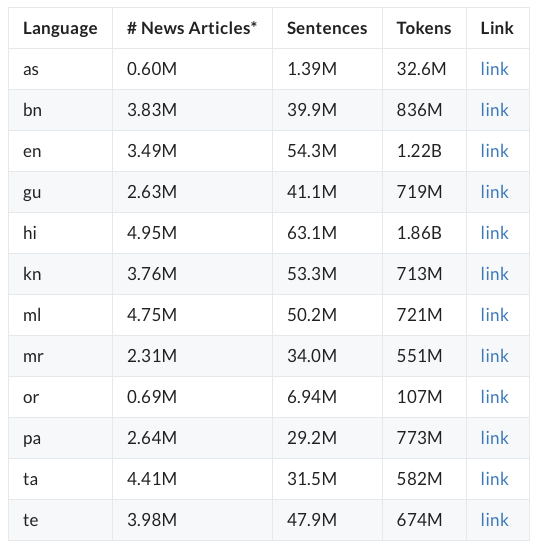

Milestone 1: Develop text classifier of our own

In [4]:
# The path to the  folder for Indic NLP library
DATASETS=r"/content/drive/MyDrive/Adv_ML_Project"

# The path to the folder for Indic NLP Resources
RESOURCES=r"/content/drive/MyDrive/Adv_ML_Project"

In [5]:
import sys
sys.path.append(r'{}'.format(DATASETS))

In [6]:
from indicnlp import common
common.set_resources_path(RESOURCES)

Reference: https://nbviewer.org/url/anoopkunchukuttan.github.io/indic_nlp_library/doc/indic_nlp_examples.ipynb

In [7]:
from indicnlp.tokenize import sentence_tokenize

indic_string="""तो क्या विश्व कप 2019 में मैच का बॉस टॉस है? यानी मैच में हार-जीत में \
टॉस की भूमिका अहम है? आप ऐसा सोच सकते हैं। विश्वकप के अपने-अपने पहले मैच में बुरी तरह हारने वाली एशिया की दो टीमों \
पाकिस्तान और श्रीलंका के कप्तान ने हालांकि अपने हार के पीछे टॉस की दलील तो नहीं दी, लेकिन यह जरूर कहा था कि वह एक अहम टॉस हार गए थे।"""
sentences=sentence_tokenize.sentence_split(indic_string, lang='hi')
for t in sentences:
    print(t)

तो क्या विश्व कप 2019 में मैच का बॉस टॉस है?
यानी मैच में हार-जीत में टॉस की भूमिका अहम है?
आप ऐसा सोच सकते हैं।
विश्वकप के अपने-अपने पहले मैच में बुरी तरह हारने वाली एशिया की दो टीमों पाकिस्तान और श्रीलंका के कप्तान ने हालांकि अपने हार के पीछे टॉस की दलील तो नहीं दी, लेकिन यह जरूर कहा था कि वह एक अहम टॉस हार गए थे।


In [8]:
from indicnlp.tokenize import indic_tokenize  

indic_string='सुनो, कुछ आवाज़ आ रही है। फोन?'

print('Input String: {}'.format(indic_string))
print('Tokens: ')
for t in indic_tokenize.trivial_tokenize(indic_string): 
    print(t)

Input String: सुनो, कुछ आवाज़ आ रही है। फोन?
Tokens: 
सुनो
,
कुछ
आवाज़
आ
रही
है
।
फोन
?


In [9]:
import os
path = "/content/drive/MyDrive/Adv_ML_Project/Wikipedia articles/hindi_wiki_55k/train/train"
imgs = os.listdir(path)
for img in imgs:
    os.remove(f'{path}/{img}')

FileNotFoundError: ignored

In [10]:
import torch
import torchtext


In [17]:
from_path_hi = '/content/drive/MyDrive/Adv_ML_Project/hi.tar.gz'
from_path_bn = '/content/drive/MyDrive/Adv_ML_Project/bn.tar.xz'
from_path_kn = '/content/drive/MyDrive/Adv_ML_Project/kn.tar.xz'
from_path_ml = '/content/drive/MyDrive/Adv_ML_Project/ml.tar.xz'
from_path_ta = '/content/drive/MyDrive/Adv_ML_Project/ta.tar.xz'

In [18]:
torchtext.utils.extract_archive(from_path_hi, to_path=None, overwrite=False)

['/content/drive/MyDrive/Adv_ML_Project/data/hi/hi.txt']

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
hindi_txt = open('/content/drive/MyDrive/Adv_ML_Project/data/hi/hi.txt').read()
raw_data = {"Hindi": [line for line in hindi_txt[1:1000]]}
df = pd.DataFrame(raw_data, columns=['Hindi'])
train, test = train_test_split(df, test_size=0.2)


In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Adv_ML_Project"

Milestone 2: See text classificaiton using INLTK 

In [3]:
%cd /content/drive/MyDrive/Adv_ML_Project/

/content/drive/MyDrive/Adv_ML_Project


In [4]:
%pwd

'/content/drive/MyDrive/Adv_ML_Project'

In [6]:
!kaggle datasets list -s 'hindi-wikipedia'

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
disisbig/hindi-wikipedia-articles-172k                     Hindi Wikipedia Articles - 172k                    208MB  2019-12-24 05:01:30            393         19  0.6875           
zarajamshaid/language-identification-datasst               Language Identification dataset                      6MB  2018-12-19 18:12:23           2117         36  1.0              
disisbig/hindi-wikipedia-articles-55k                      Hindi Wikipedia Articles - 55k                      63MB  2019-12-24 04:31:32            200          8  0.625            
shivavashishtha/shark-tank-india-dataset                   Shark Tank India Dataset       

In [8]:
!kaggle datasets download -d 'disisbig/hindi-wikipedia-articles-55k'

 90% 57.0M/63.3M [00:02<00:00, 28.3MB/s]
100% 63.3M/63.3M [00:02<00:00, 31.5MB/s]


The hindi dataset is now sitting in the folder in zip format

Milestone 3: Use transfer learning on INLTK for classification accuracy improvement

Credit for datasets: @inproceedings{kakwani2020indicnlpsuite,
    title={{IndicNLPSuite: Monolingual Corpora, Evaluation Benchmarks and Pre-trained Multilingual Language Models for Indian Languages}},
    author={Divyanshu Kakwani and Anoop Kunchukuttan and Satish Golla and Gokul N.C. and Avik Bhattacharyya and Mitesh M. Khapra and Pratyush Kumar},
    year={2020},
    booktitle={Findings of EMNLP},
}

